In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, linregress
import matplotlib.pyplot as plt
from math import erf, erfc

In [2]:
df = pd.read_excel('freefall.xlsx')
df

,h (m) = 0.703 m,h (m) = 0.8635 m,h (m) = 0.535 m,h (m) = 0.606 m
0,375.8,418.7,328.0,351.6
1,375.8,418.4,326.4,351.2
2,384.5,418.6,327.5,350.2
3,387.4,417.2,329.2,350.2
4,378.3,419.3,329.4,350.4
5,377.4,419.0,330.1,350.8
6,378.1,419.4,329.2,350.9
7,378.5,419.3,328.4,350.0
8,377.2,418.4,328.6,349.4
9,378.8,419.4,328.6,350.7


In order to implement Chauvenet's Criterion to filter out the outilers, we first implement the formula

$$P_z = 1 - \frac{1}{4N},$$

where $N$ is the number of observations. We then find the value of the Quantile function for the Normal distribution

$$D_\max = Q(P_z).$$

The outliers will be all the data satisfying 

$$\frac{|x-\bar{x}|}{s_x} > D_\max,$$

where $\bar{x}$ and $s_x$ are, respectivelly, the mean and the std of the data.

In [3]:
def chauv_crit_filter(data):
    
    N = len(data)
    P_z = 1 - 1/(4*N)
    D_max = norm.ppf(P_z)
    
    data_z = (data - data.mean()).abs()/data.std()
    return np.where(data_z > D_max, np.nan, data)

In [4]:
data_1 = chauv_crit_filter(df['h (m) = 0.703 m'])
data_2 = chauv_crit_filter(df['h (m)  = 0.8635 m'])
data_3 = chauv_crit_filter(df['h (m) = 0.535 m'])
data_4 = chauv_crit_filter(df['h (m) = 0.606 m'])
data = np.array([data_1, data_2, data_3, data_4]).T

In [5]:
columns = ['h (m) = 0.703 m', 
           'h (m)  = 0.8635 m', 
           'h (m) = 0.535 m',
           'h (m) = 0.606 m']

data_df = pd.DataFrame(data, columns=columns)
data_df

,h (m) = 0.703 m,h (m) = 0.8635 m,h (m) = 0.535 m,h (m) = 0.606 m
0,375.8,418.7,328.0,351.6
1,375.8,418.4,NaN,351.2
2,384.5,418.6,327.5,350.2
3,NaN,417.2,329.2,350.2
4,378.3,419.3,329.4,350.4
5,377.4,419.0,330.1,350.8
6,378.1,419.4,329.2,350.9
7,378.5,419.3,328.4,350.0
8,377.2,418.4,328.6,349.4
9,378.8,419.4,328.6,350.7


### 1st Column

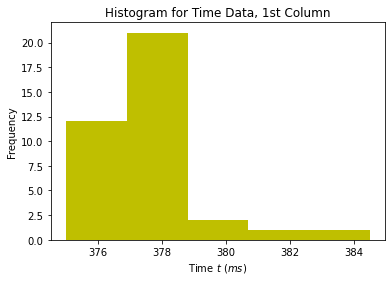

In [8]:
time = data_df['h (m) = 0.703 m'].dropna().values

#plotting the histogram 
O, bins, patches = plt.hist(time, 5, color='y')
plt.title('Histogram for Time Data, 1st Column')
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_hist_1.jpg')
plt.show()

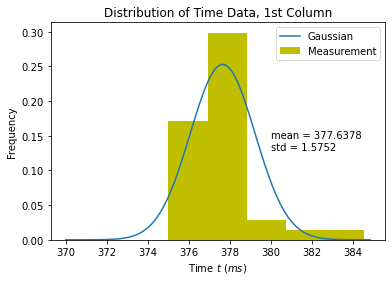

In [10]:
time = data_df['h (m) = 0.703 m'].dropna().values
mu, sigma = norm.fit(time)

#plotting the histogram with gaussian curve
t = time.max() - time.min()
x = np.arange(time.min() - 5, time.max() + .5, t/50.)
y = norm.pdf(x, mu, sigma)

textstr = '\n'.join((f'mean = {round(mu, 4)}', 
                    f'std = {round(sigma, 4)}'))
plt.text(380, .13, textstr)

plt.plot(x, y)
plt.hist(time, 5, density=True, color='y')
plt.title('Distribution of Time Data, 1st Column')
plt.legend(['Gaussian','Measurement'])
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_gauss_figure_1.jpg')
plt.show()

We perfrom the $\chi^2$ test to check if our data really matches the Gauissian distribution.

First, we write some helper functions.

In [11]:
def Q(x):
    return norm.cdf(np.abs(x)) - .5

In [12]:
def calc_probs(t1, t2):
    
    if t1 <= 0 and t2 <= 0:
        return Q(t1) - Q(t2)
    
    elif t1 <= 0 and t2 > 0:
        return Q(t1) + Q(t2)
    
    else:
        return Q(t2) - Q(t1)

In [13]:
def chi_sq_redux(O, E, d):
    ch = np.sum(((O - E)**2)/E)/d
    print('Reduced chi-square:', np.round(ch, 2))

In [14]:
vals = (bins - mu)/sigma
vals

array([-1.67459964, -0.46840748,  0.73778468,  1.94397684,  3.150169  ,
        4.35636116])

In [15]:
#bin probabilities
probs = np.array([np.round(calc_probs(vals[i], vals[i+1]), 2) for i in range(len(vals) - 1)])
probs

array([0.27, 0.45, 0.2 , 0.03, 0.  ])

In [16]:
O

array([12., 21.,  2.,  1.,  1.])

We omitt the bins with small probabilities. Thus, we work with 4 bins and 36 datapoints.

In [17]:
N = 36
E = N*np.array(probs)
E

array([ 9.72, 16.2 ,  7.2 ,  1.08,  0.  ])

In [18]:
#observed and expected values
idx = probs != 0
O = O[idx]
E = E[idx]

#the degrees of freedom
n = len(O)
d = n - 3

print('The observed number of samples:', O)
print('The expected number of samples:', E)
print('The degrees of freedom:', d)

The observed number of samples: [12. 21.  2.  1.]
The expected number of samples: [ 9.72 16.2   7.2   1.08]
The degrees of freedom: 1


In [19]:
chi_sq_redux(O, E, d)

Reduced chi-square: 5.72


For the given $\tilde{\chi}^2$ score, we find the p-value to be $\approx 0.05$. This means that even at 5% significance level we might accept that the time data follows the Gaussian distribution.

### 2nd Column

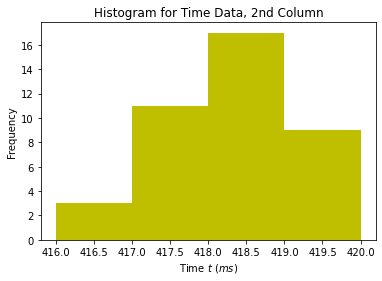

In [20]:
time = data_df['h (m)  = 0.8635 m'].dropna().values

#plotting the histogram 
O, bins, patches = plt.hist(time, 4, color='y')
plt.title('Histogram for Time Data, 2nd Column')
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_hist_2.jpg')
plt.show()

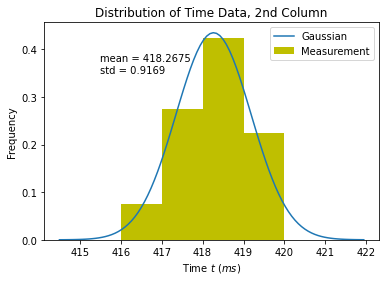

In [21]:
time = data_df['h (m)  = 0.8635 m'].dropna().values
mu, sigma = norm.fit(time)

#plotting the histogram with gaussian curve
t = time.max() - time.min()
x = np.arange(time.min() - 1.5, time.max() + 2, t/50.)
y = norm.pdf(x, mu, sigma)

textstr = '\n'.join((f'mean = {round(mu, 4)}', 
                    f'std = {round(sigma, 4)}'))
plt.text(415.5, .35, textstr)

plt.plot(x, y)
plt.hist(time, 4, density=True, color='y')
plt.title('Distribution of Time Data, 2nd Column')
plt.legend(['Gaussian','Measurement'])
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_gauss_figure_2.jpg')
plt.show()

In [22]:
vals = (bins - mu)/sigma
vals

array([-2.47302431, -1.38238515, -0.29174598,  0.79889319,  1.88953236])

In [23]:
#bin probabilities
probs = np.array([np.round(calc_probs(vals[i], vals[i+1]), 2) for i in range(len(vals) - 1)])
probs

array([0.08, 0.3 , 0.4 , 0.18])

In [24]:
N = sum(O)
E = N*np.array(probs)
E

array([ 3.2, 12. , 16. ,  7.2])

In [25]:
#the degrees of freedom
n = len(O)
d = n - 3

print('The observed number of samples:', O)
print('The expected number of samples:', E)
print('The degrees of freedom:', d)

The observed number of samples: [ 3. 11. 17.  9.]
The expected number of samples: [ 3.2 12.  16.   7.2]
The degrees of freedom: 1


In [26]:
chi_sq_redux(O, E, d)

Reduced chi-square: 0.61


For the given $\tilde{\chi}^2$ score, we find the p-value to be $\approx 0.44$. This means we accept that the time data follows the Gaussian distribution  with high confidence.

### 3rd Column

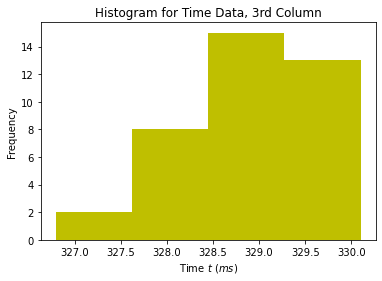

In [27]:
time = data_df['h (m) = 0.535 m'].dropna().values

#plotting the histogram 
O, bins, patches = plt.hist(time, 4, color='y')
plt.title('Histogram for Time Data, 3rd Column')
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_hist_3.jpg')
plt.show()

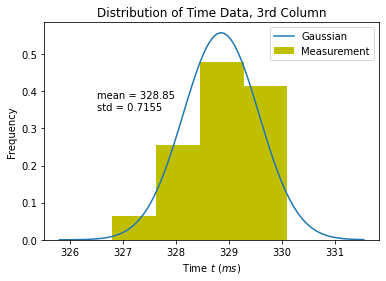

In [28]:
time = data_df['h (m) = 0.535 m'].dropna().values
mu, sigma = norm.fit(time)

#plotting the histogram with gaussian curve
t = time.max() - time.min()
x = np.arange(time.min() - 1, time.max() + 1.5, t/50.)
y = norm.pdf(x, mu, sigma)

textstr = '\n'.join((f'mean = {round(mu, 4)}', 
                    f'std = {round(sigma, 4)}'))
plt.text(326.5, .35, textstr)

plt.plot(x, y)
plt.hist(time, 4, density=True, color='y')
plt.title('Distribution of Time Data, 3rd Column')
plt.legend(['Gaussian','Measurement'])
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_gauss_figure_3.jpg')
plt.show()

In [29]:
vals = (bins - mu)/sigma
vals

array([-2.86503573, -1.71203354, -0.55903136,  0.59397082,  1.746973  ])

In [30]:
#bin probabilities
probs = np.array([np.round(calc_probs(vals[i], vals[i+1]), 2) for i in range(len(vals) - 1)])
probs

array([0.04, 0.24, 0.44, 0.24])

In [31]:
N = sum(O)
E = N*np.array(probs)
E

array([ 1.52,  9.12, 16.72,  9.12])

In [32]:
#the degrees of freedom
n = len(O)
d = n - 3

print('The observed number of samples:', O)
print('The expected number of samples:', E)
print('The degrees of freedom:', d)

The observed number of samples: [ 2.  8. 15. 13.]
The expected number of samples: [ 1.52  9.12 16.72  9.12]
The degrees of freedom: 1


In [33]:
chi_sq_redux(O, E, d)

Reduced chi-square: 2.12


For the given $\tilde{\chi}^2$ score, we find the p-value to be $\approx 0.15$. This means that we can accept that the time data follows the Gaussian distribution.

### 4th Column

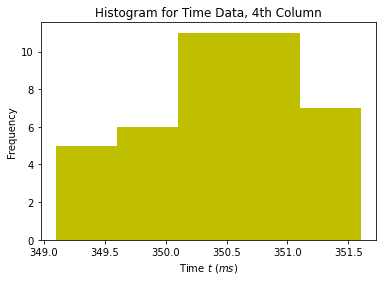

In [34]:
time = data_df['h (m) = 0.606 m'].dropna().values

#plotting the histogram 
O, bins, patches = plt.hist(time, 5, color='y')
plt.title('Histogram for Time Data, 4th Column')
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_hist_4.jpg')
plt.show()

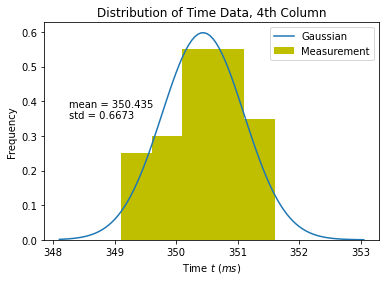

In [35]:
time = data_df['h (m) = 0.606 m'].dropna().values
mu, sigma = norm.fit(time)

#plotting the histogram with gaussian curve
t = time.max() - time.min()
x = np.arange(time.min() - 1, time.max() + 1.5, t/50.)
y = norm.pdf(x, mu, sigma)

textstr = '\n'.join((f'mean = {round(mu, 4)}', 
                    f'std = {round(sigma, 4)}'))
plt.text(348.25, .35, textstr)

plt.plot(x, y)
plt.hist(time, 5, density=True, color='y')
plt.title('Distribution of Time Data, 4th Column')
plt.legend(['Gaussian','Measurement'])
plt.xlabel('Time $t\ (ms)$')
plt.ylabel('Frequency')
plt.savefig('distribution_gauss_figure_4.jpg')
plt.show()

In [36]:
vals = (bins - mu)/sigma
vals

array([-2.00063153, -1.25133133, -0.50203113,  0.24726907,  0.99656927,
        1.74586946])

In [37]:
#bin probabilities
probs = np.array([np.round(calc_probs(vals[i], vals[i+1]), 2) for i in range(len(vals) - 1)])
probs

array([0.08, 0.2 , 0.29, 0.24, 0.12])

In [38]:
N = sum(O)
E = N*np.array(probs)
E

array([ 3.2,  8. , 11.6,  9.6,  4.8])

In [39]:
#the degrees of freedom
n = len(O)
d = n - 3

print('The observed number of samples:', O)
print('The expected number of samples:', E)
print('The degrees of freedom:', d)

The observed number of samples: [ 5.  6. 11. 11.  7.]
The expected number of samples: [ 3.2  8.  11.6  9.6  4.8]
The degrees of freedom: 2


In [40]:
chi_sq_redux(O, E, d)

Reduced chi-square: 1.38


For the given $\tilde{\chi}^2$ score, we find the p-value to be $\approx 0.25$. This means that we can accept that the time data follows the Gaussian distribution with good confidence.

Before continuing, we convert all the time values from miliseconds to seconds.

In [41]:
data_df = data_df*.001
data_df

,h (m) = 0.703 m,h (m) = 0.8635 m,h (m) = 0.535 m,h (m) = 0.606 m
0,0.3758,0.4187,0.3280,0.3516
1,0.3758,0.4184,NaN,0.3512
2,0.3845,0.4186,0.3275,0.3502
3,NaN,0.4172,0.3292,0.3502
4,0.3783,0.4193,0.3294,0.3504
5,0.3774,0.4190,0.3301,0.3508
6,0.3781,0.4194,0.3292,0.3509
7,0.3785,0.4193,0.3284,0.3500
8,0.3772,0.4184,0.3286,0.3494
9,0.3788,0.4194,0.3286,0.3507


In [42]:
h_unc = np.array([[.001, .001, .001, .001]])

In [43]:
t_mean = np.round(data_df.mean().values, 4).reshape(1, -1)
t_mean

array([[0.3776, 0.4183, 0.3289, 0.3504]])

In [44]:
t_std = np.round(data_df.std().values, 4).reshape(1, -1)
t_std

array([[0.0016, 0.0009, 0.0007, 0.0007]])

In [45]:
t_perc = np.round((t_std/t_mean)*100, 2).reshape(1, -1)
t_perc

array([[0.42, 0.22, 0.21, 0.2 ]])

In [46]:
index = ['Height Uncertainty $\Delta h\ (m)$', 
         'Mean Time $t_{mean}\ (s)$',
         'STD of the Time Data $\sigma_t\ (s)$',
         'STD Percent w.r.t. Mean Time $\sigma_t/t_{mean}\ (\%)$']

table_3 = np.vstack((h_unc, t_mean, t_std, t_perc))
table_3_df = pd.DataFrame(table_3, index=index, columns=columns)
table_3_df

,h (m) = 0.703 m,h (m) = 0.8635 m,h (m) = 0.535 m,h (m) = 0.606 m
Height Uncertainty $\Delta h\ (m)$,0.0010,0.0010,0.0010,0.0010
Mean Time $t_{mean}\ (s)$,0.3776,0.4183,0.3289,0.3504
STD of the Time Data $\sigma_t\ (s)$,0.0016,0.0009,0.0007,0.0007
STD Percent w.r.t. Mean Time $\sigma_t/t_{mean}\ (\%)$,0.4200,0.2200,0.2100,0.2000


The values of the Standard deviation percent respect to Mean time, $\sigma_t⁄t_{mean}$ (see the table above) are 0.42%, 0.22%, 0.21%  and  0.2% , for the 1st, 2nd, 3rd and 4th column of the Time data.

According to the statistical interpretation of the mean and Standard deviation, 96.87% of the data is in the interval $t_{mean}\pm 3\sigma_t$. Since $\sigma_t⁄t_{mean}$ values are small, it means that 96.87% of the time data is in a small interval around the Mean time, hence the time data for each group is narrowly distributed, and it is a peaked Gaussian distribution, with small spreading.

Therefore, the Hypothesis 2:

1.	For each of the four heights, 40 values of the time were measured, hence the measurement of falling time from the same height should be Gaussian distributed.


We calculate the Gravity Acceleration $g$ using the formula

$$g = \frac{2h}{t_{mean}^2},$$

and the uncertainty for $g$ is given by

$$\Delta g = 2\sqrt{\Big(\frac{\Delta h}{t_{mean}^2}\Big)^2 + \Big(\frac{2h\sigma_t}{t_{mean}^3}\Big)^2}.$$

In [47]:
h = np.array([[.703, .8635, .535, .606]])

In [48]:
g = np.round((2*h)/(t_mean**2), 6).reshape(1, -1)
g

array([[9.861009, 9.869988, 9.891361, 9.871302]])

In [49]:
term_1 = (.001/(t_mean**2))**2
term_2 = ((2*h*t_std)/(t_mean**3))**2
delta_g = np.round(2*np.sqrt(term_1 + term_2), 6)
delta_g

array([[0.084737, 0.043983, 0.045984, 0.042672]])

In [50]:
index = ['Height Uncertainty $\Delta h\ (m)$', 
         'Mean Time $t_{mean}\ (s)$',
         'STD of the Time Data $\sigma_t\ (s)$',
         'Gravity Acceleration $g\ (m/s^2)$',
         'Gravity Acceleration Uncertainty $\Delta g\ (m/s^2)$']

table_4 = np.vstack((h_unc, t_mean, t_std, g, delta_g))
table_4_df = pd.DataFrame(table_4, index=index, columns=columns)
table_4_df

,h (m) = 0.703 m,h (m) = 0.8635 m,h (m) = 0.535 m,h (m) = 0.606 m
Height Uncertainty $\Delta h\ (m)$,0.001000,0.001000,0.001000,0.001000
Mean Time $t_{mean}\ (s)$,0.377600,0.418300,0.328900,0.350400
STD of the Time Data $\sigma_t\ (s)$,0.001600,0.000900,0.000700,0.000700
Gravity Acceleration $g\ (m/s^2)$,9.861009,9.869988,9.891361,9.871302
Gravity Acceleration Uncertainty $\Delta g\ (m/s^2)$,0.084737,0.043983,0.045984,0.042672


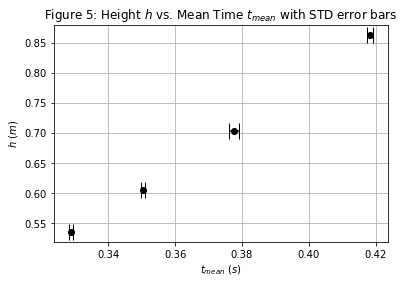

In [51]:
plt.errorbar(t_mean.squeeze(), h.squeeze(), xerr=t_std.squeeze(), fmt='o', color='black', ecolor='black', capsize=8)
plt.title('Figure 5: Height $h$ vs. Mean Time $t_{mean}$ with STD error bars')
plt.xlabel('$t_{mean}\ (s)$')
plt.ylabel('$h\ (m)$')
plt.grid(b=True)
plt.savefig('fig5.jpg')
plt.show();

In [52]:
#fitting the second order polynomial
poly2_coeff = np.polyfit(t_mean.squeeze(), h.squeeze(), deg=2)
poly2_coeff

array([ 5.51221413, -0.44446081,  0.08491322])

In [53]:
def poly2(x):
    return 5.5122*(x**2) - .4445*x + .0849

In [54]:
#computing the R-squared score
rss = np.linalg.norm(h - poly2(t_mean))**2
tss = np.linalg.norm(h - h.mean())**2
R_sq = np.round(1 - rss/tss, 4)
R_sq

1.0

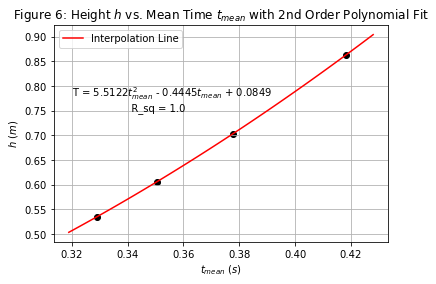

In [55]:
#plotting an interpolation polynomial
t = t_mean.max() - t_mean.min()
x = np.arange(t_mean.min() - .01, t_mean.max() + .01, t/50.)

plt.scatter(t_mean, h, c='black')
plt.plot(x, poly2(x), c='r')
plt.legend(['Interpolation Line'], loc='upper left')
plt.xlabel('$t_{mean}\ (s)$')
plt.ylabel('$h\ (m)$')
plt.grid(b=True)

textstr = '\n'.join(('T = 5.5122$t_{mean}^2$ - 0.4445$t_{mean}$ + 0.0849', 
                    f'                   R_sq = {R_sq}'))
plt.text(.32, .75, textstr)

plt.title('Figure 6: Height $h$ vs. Mean Time $t_{mean}$ with 2nd Order Polynomial Fit')
plt.savefig('fig_6.jpg')
plt.show()

In [56]:
#linear function
def func(x, a, b):
    return a + b*x

intercept: 0.002234746483311456 +- 0.0020497726580212846
slope: 4.919784645862007 +- 0.014704897164154119
R-value: 0.9999910664107999


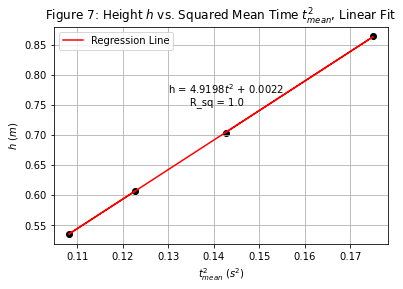

In [57]:
#fitting a linear regression line
results = linregress(t_mean.squeeze()**2, h.squeeze())
print ("intercept:", results.intercept,"+-", results.intercept_stderr)
print ("slope:", results.slope,"+-", results.stderr)
print("R-value:", results.rvalue)

#plotting a linear regression line
plt.scatter(t_mean**2, h, c='black')
plt.plot(t_mean.squeeze()**2, func(t_mean.squeeze()**2, results.intercept, results.slope), c='r')
plt.legend(['Regression Line'], loc='upper left')
plt.xlabel('$t_{mean}^2\ (s^2)$')
plt.ylabel('$h\ (m)$')
plt.grid(b=True)

textstr = '\n'.join((f'h = {round(results.slope, 4)}$t^2$ + {round(results.intercept, 4)}', 
                    f'       R_sq = {round(results.rvalue**2, 4)}'))
plt.text(.13, .75, textstr)

plt.title('Figure 7: Height $h$ vs. Squared Mean Time $t_{mean}^2$, Linear Fit')
plt.savefig(f'fig_7.jpg')
plt.show()

From Figure 7, the value of $g$ can be obtained through

$$h = \frac{1}{2}gt_{mean}^2,$$

which compared to the Linear Fit equation (see the figure above; we ommit the intercept, since it's small compared to the slope):

$$h = 4.9198t_{mean}^2$$

leads to 

$$\frac{1}{2}g = s\rightarrow g = 2s.$$

From this equation, the uncertainty (error) in $g$ is:

$$\Delta g = 2(\Delta s).$$

Replacing the numerical values:

$$g = 2s\rightarrow g = 2(4.9198\ m/s^2)\rightarrow g = 9.8396\ m/s^2$$
$$\Delta g = 2(\Delta s)\rightarrow \Delta g = 2(0.0147\ m/s^2)\rightarrow \Delta g = 0.0294\ m/s^2.$$

Therefore, the measured value of the Gravity Acceleration is

$$g = (9.8396\pm 0.0294)\ m/s^2.$$

The Relative Uncertainty or Precision of this measurement is 

$$\frac{\Delta g}{g} = \frac{0.0294\ m/s^2}{9.8396\ m/s^2}\rightarrow \frac{\Delta g}{g} = 0.00299$$

or

$$\frac{\Delta g}{g} = 0.3\%.$$

### Conclusions 

The experiment achieved the stated goal: to test the free fall model of motion (air friction neglected). Through the equation  $h=(gt^2)/2$ , the value of the gravity acceleration found was $g=9.84\ m⁄s^2$,  with an uncertainty of $\Delta g=0.03\ m/s^2$, which set this value with a Relative uncertainty (Precision) of $\Delta g⁄g=0.3\%$ respect to the reference value $g_{ref}=9.81\ m⁄s^2$, which shows a high degree of Precision in the experimental results.

The measured 40 values of time for each height, followed a Normal or Gaussian distribution, it is, they were randomly distributed, hence the mean or average value can be taken as the falling time for each height, and the Standard deviation of the sample, as its uncertainty.

Finally, the systematic errors were reduced to a negligible level, because the experimental $g$ resulted to be in good agreement with the accepted value, $g_{ref}=9.81\ m⁄s^2$.
